#  위스콘신 유방암 예측

In [2]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score ,roc_auc_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset= pd.read_csv('sklearn_csv/pima_data.csv')

target = dataset['Outcome'].tolist()
ftr = dataset.drop('Outcome', axis=1)

# 학습 80 테스트 20으로 데이터 추출
X_train, X_test, y_train, y_test =train_test_split(ftr, target, test_size=0.2, random_state=156)

# n_estimators 400으로 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBOOST와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train,y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.630031
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.607335
[3]	valid_0's binary_logloss: 0.585795
[4]	valid_0's binary_logloss: 0.566393
[5]	valid_0's binary_logloss: 0.551676
[6]	valid_0's binary_logloss: 0.541892
[7]	valid_0's binary_logloss: 0.535487
[8]	valid_0's binary_logloss: 0.526912
[9]	valid_0's binary_logloss: 0.518037
[10]	valid_0's binary_logloss: 0.512287
[11]	valid_0's binary_logloss: 0.511588
[12]	valid_0's binary_logloss: 0.504413
[13]	valid_0's binary_logloss: 0.49867
[14]	valid_0's binary_logloss: 0.496196
[15]	valid_0's binary_logloss: 0.492987
[16]	valid_0's binary_logloss: 0.489374
[17]	valid_0's binary_logloss: 0.491211
[18]	valid_0's binary_logloss: 0.491578
[19]	valid_0's binary_logloss: 0.489177
[20]	valid_0's binary_logloss: 0.488728
[21]	valid_0's binary_logloss: 0.486497
[22]	valid_0's binary_logloss: 0.48802
[23]	valid_0's binary_logloss: 0.487214
[24]	valid_0's binary_logloss

In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [5]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[84 13]
 [26 31]]
정확도: 0.7468, 정밀도: 0.7045, 재현율: 0.5439, F1: 0.6139, AUC:0.8291


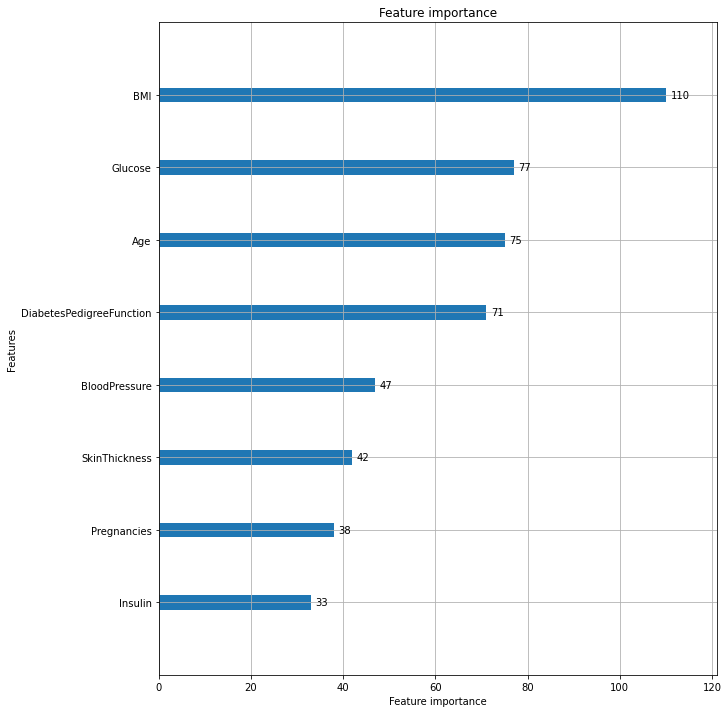

In [6]:
# plot_importance()를 이용해 피처 중요도 시각화

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)